In [3]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array,ImageDataGenerator
from PIL import Image
from keras.layers import *
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.models import Model, load_model, Sequential
from keras.optimizers import SGD,Adam
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [2]:
image_files=[]
path = os.path.join(os.getcwd(),'gender_dataset_face','gender_dataset_face\\')
for root, dirs, files in os.walk(path+'man'):
        for file_ in files:
            if(file_.split('.')[1]=='jpg'):
                image_files.append(os.path.join(root, file_))
                
for root, dirs, files in os.walk(path+'woman'):
        for file_ in files:
            if(file_.split('.')[1]=='jpg'):
                image_files.append(os.path.join(root, file_))

In [3]:
image_files[-1]

'C:\\Users\\piyush.chaudhari\\Documents\\Gender Classification\\gender_dataset_face\\gender_dataset_face\\woman\\face_999.jpg'

In [4]:
def preprocess(image_path):
    img = Image.open(image_path)
    img = img.resize((96,96), Image.ANTIALIAS)
    img = img_to_array(img)
    img = (img - 128) / 128
    return img

In [5]:
def list2np(l, size):
    n = np.array(l)
    return(n.reshape((size,)+img_shape))

In [6]:
images = list()
labels = list()
for image in image_files:
    img = preprocess(image)
    images.append(img)
    
    label = image.split('\\')[-2]
    if(label == 'woman'):
        label = 1
    else:
        label = 0
    labels.append([label])

In [7]:
img_size = 96
img_shape = (img_size, img_size, 3)
images = list2np(images,len(images))

In [8]:
images.shape,type(images)

((2307, 96, 96, 3), numpy.ndarray)

In [9]:
labels = np.array(labels)
labels.shape,type(labels)

((2307, 1), numpy.ndarray)

In [10]:
images.dtype,labels.dtype

(dtype('float32'), dtype('int32'))

In [11]:
X_train,X_test,y_train,y_test = train_test_split(images, labels, test_size=0.2,random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test= to_categorical(y_test, num_classes=2)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(96,96,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32, (3,3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(2,activation='sigmoid'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 258       
Total para

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [36]:
opt = Adam(lr=0.0002, beta_1=0.5,clipvalue = 1)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
#model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,verbose=1)
model_history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size=64),validation_data=(X_test,y_test),epochs=50,verbose=1)

Epoch 1/50
29/29 [==============================] - 57s 2s/step - loss: 0.6855 - acc: 0.5709 - val_loss: 0.7816 - val_acc: 0.7749
Epoch 2/50
29/29 [==============================] - 54s 2s/step - loss: 0.6680 - acc: 0.6783 - val_loss: 2.0369 - val_acc: 0.7662
Epoch 3/50
29/29 [==============================] - 53s 2s/step - loss: 0.6353 - acc: 0.6999 - val_loss: 3.3237 - val_acc: 0.7532
Epoch 4/50
29/29 [==============================] - 54s 2s/step - loss: 0.5830 - acc: 0.7311 - val_loss: 3.7157 - val_acc: 0.7435
Epoch 5/50
29/29 [==============================] - 52s 2s/step - loss: 0.5459 - acc: 0.7443 - val_loss: 3.5260 - val_acc: 0.7684
Epoch 6/50
29/29 [==============================] - 54s 2s/step - loss: 0.5179 - acc: 0.7567 - val_loss: 3.2914 - val_acc: 0.7738
Epoch 7/50
29/29 [==============================] - 54s 2s/step - loss: 0.5058 - acc: 0.7675 - val_loss: 3.4161 - val_acc: 0.7749
Epoch 8/50
29/29 [==============================] - 54s 2s/step - loss: 0.4948 - acc: 0.75

In [37]:
model_json = model.to_json()
with open("gender_classification_model.json","w") as json_file:
    json_file.write(model_json)

model.save_weights("gender_classification_model.h5")
print("Model saved")

Model saved


In [49]:
model_history.params

{'epochs': 50,
 'steps': 29,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [50]:
model_history.history

{'val_loss': [0.7816326255664164,
  2.0369021985437965,
  3.3237485183781876,
  3.7156602593211385,
  3.5260300994951486,
  3.291410396109412,
  3.416053653279424,
  3.0038133663532536,
  3.0562982172160953,
  3.397021805569207,
  2.8154201326948223,
  2.842701065075862,
  2.8271577316961247,
  2.8952922212097034,
  2.62591814994812,
  2.834131113894574,
  2.9409055967867634,
  2.7653663406124362,
  2.507121843951089,
  3.0054940361997264,
  2.8548395530486004,
  2.7918478038919954,
  2.770994587894126,
  2.7724221764188823,
  2.719932899846659,
  3.0606885441453944,
  2.8750662174059713,
  2.7061353214891444,
  2.523572794802777,
  2.731959042869089,
  2.6272584132817918,
  2.549246021163412,
  2.971287266000525,
  3.094588619289976,
  2.926420448146341,
  2.737127738597589,
  2.8821037393627744,
  2.8055591139442475,
  2.9080080769278784,
  2.755173568601732,
  2.8879203435146445,
  2.7258630531690855,
  2.8171402706212296,
  2.774232632412023,
  2.805450861588185,
  2.69656697083345

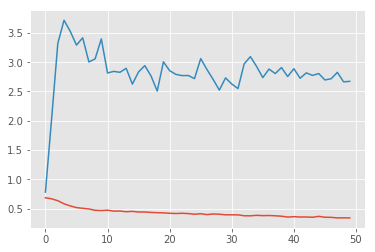

In [58]:
epochs = 50
train_loss = model_history.history['loss']
val_loss   = model_history.history['val_loss']
train_acc  = model_history.history['acc']
val_acc    = model_history.history['val_acc']
num_epochs = range(epochs)

plt.figure()
plt.plot(num_epochs, train_loss)
plt.plot(num_epochs, val_loss)

In [59]:
inp = model.input
prediction = model.predict
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp] + [prediction], [out]) for out in outputs]

layer_outs = [func([X_test]) for func in functors]

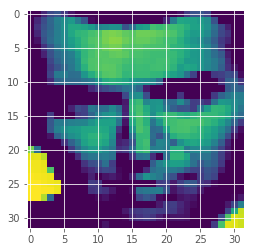

In [60]:
for i in range(0,32):
    plt.imshow(layer_outs[1][0][5,:,:,i])
#     plt.savefig('temp_'+str(i)+'.jpg')

In [4]:
json_file = open('gender_classification_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("gender_classification_model.h5")
print("Loaded model from disk")

Loaded model from disk


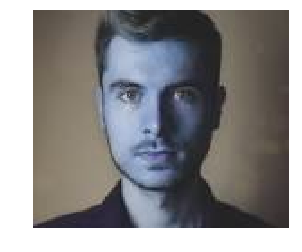

In [5]:
import cv2
image = cv2.imread("image.jpg")
plt.axis("off")
plt.imshow(image)
plt.show()

In [17]:
image = image.reshape(1,96,96,3)
predicted_class = loaded_model.predict_classes(image)
['Man' if i == 0 else 'Woman' for i in predicted_class]

['Man']